## **Baseline Machine Learning model prepared for Pos-Doctoral interview**

#### *Pipeline prepared by Brenda Ferrari*

### 0. Imports

In [55]:
import pandas as pd
import numpy as np
import json

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from IPython.display import Image, display

from utils.preprocess import Preprocess
from utils.compare import Compare
from utils.visualization import Visualization

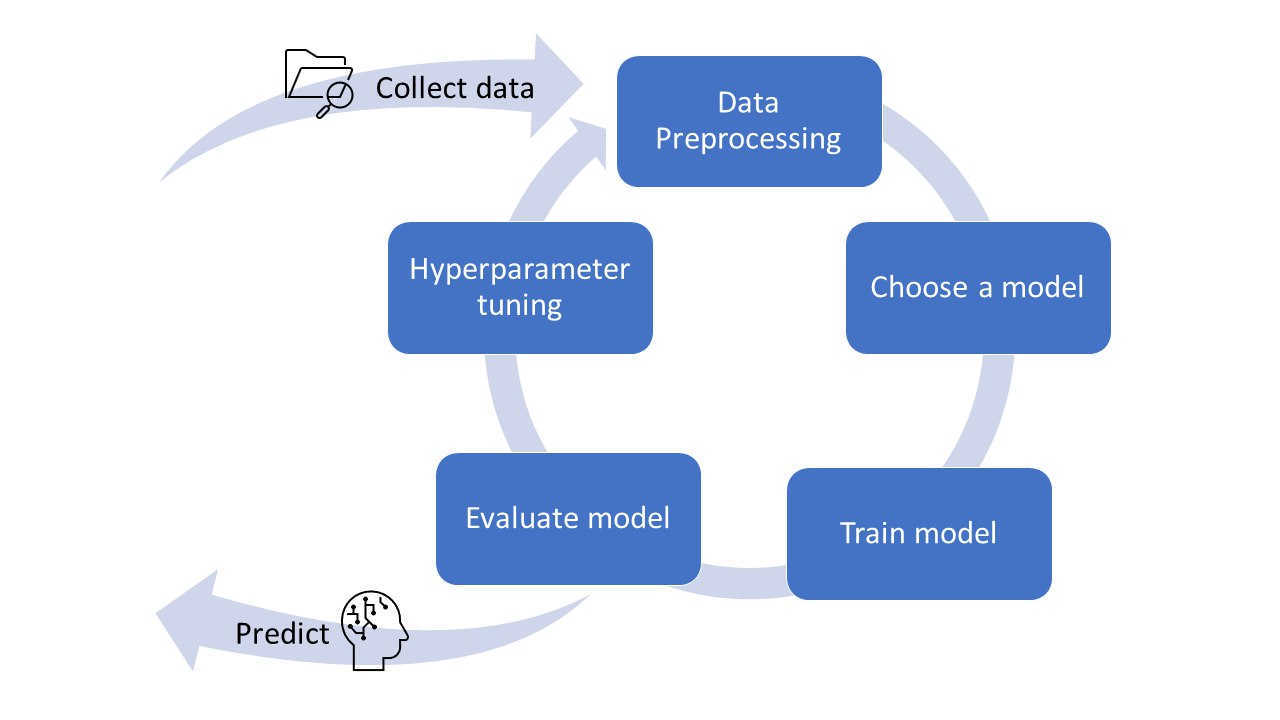

In [56]:
display(Image(filename='img/1.jpg', width=800))

### 1. Preprocessing

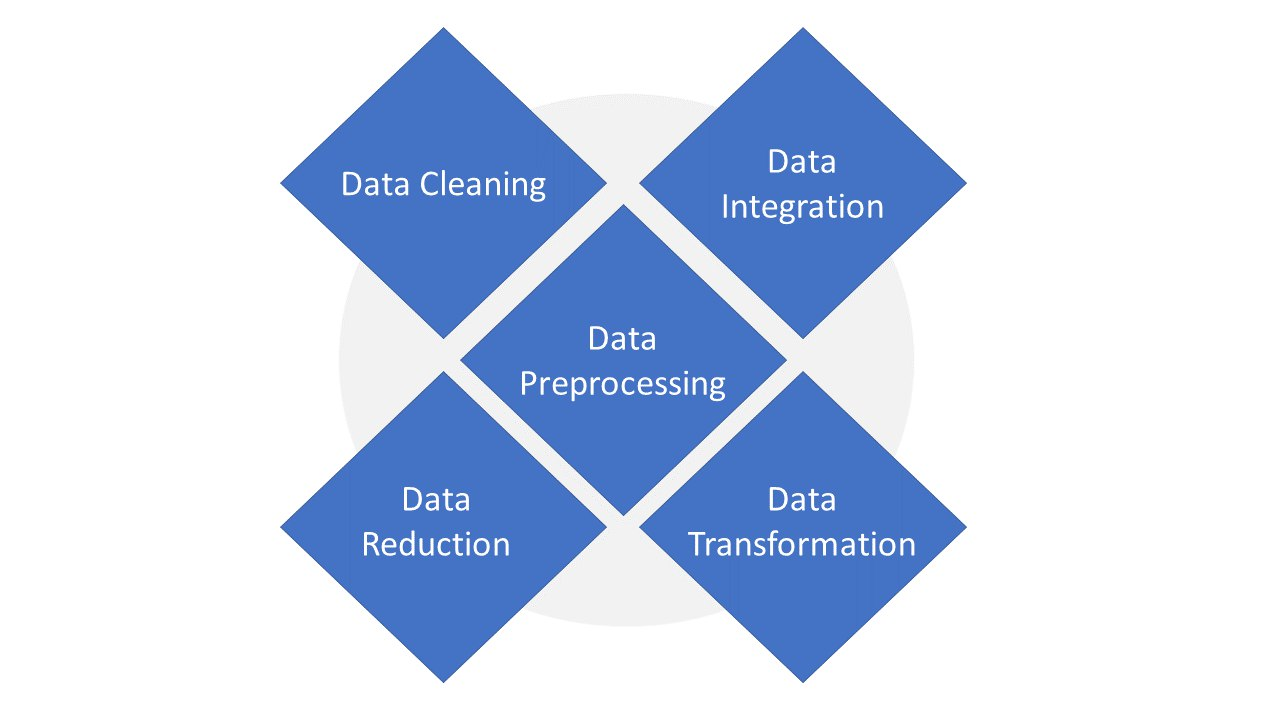

In [19]:
display(Image(filename='img/2.jpg', width=800))

In [57]:
data = pd.read_csv('task_files/dataset.csv', sep=',')
split_data = pd.DataFrame([json.loads(f) for f in data["fingerprint"].tolist()]).add_prefix('fingerprint_')
full_data = pd.concat([data, split_data], axis=1)

1.1 Independent variables

In [58]:
data_x = full_data.iloc[:,3:]
data_x

fingerprint_0  fingerprint_1  fingerprint_2  fingerprint_3  \
0                 0              0              1              0   
1                 0              1              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
8995              0              0              0              0   
8996              0              0              1              0   
8997              0              0              0              0   
8998              0              0              0              0   
8999              0              0              0              0   

      fingerprint_4  fingerprint_5  fingerprint_6  fingerprint_7  \
0                 1              0              0              0   
1                 0              0              0              0   
2                 0              0              0              1   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
8995              1              0              0              0   
8996              1              0              0              0   
8997              1              0              0              0   
8998              0              0              0              0   
8999              0              0              0              0   

      fingerprint_8  fingerprint_9  ...  fingerprint_1014  fingerprint_1015  \
0                 0              0  ...                 0                 0   
1                 0              0  ...                 1                 0   
2                 0              0  ...                 0                 0   
3                 0              0  ...                 0                 0   
4                 0              0  ...                 0                 0   
...             ...            ...  ...               ...               ...   
8995              0              0  ...                 0                 0   
8996              0              0  ...                 0                 0   
8997              0              0  ...                 0                 0   
8998              0              0  ...                 0                 0   
8999              0              0  ...                 0                 0   

      fingerprint_1016  fingerprint_1017  fingerprint_1018  fingerprint_1019  \
0                    0                 0                 0                 1   
1                    0                 0                 0                 1   
2                    0                 0                 0                 0   
3                    0                 1                 0                 1   
4                    0                 1                 0                 0   
...                ...               ...               ...               ...   
8995                 0                 1                 0                 1   
8996                 0                 0                 0                 0   
8997                 0                 0                 0                 1   
8998                 0                 0                 0                 1   
8999                 0                 0                 0                 0   

      fingerprint_1020  fingerprint_1021  fingerprint_1022  fingerprint_1023  
0                    0                 0                 0                 0  
1                    0                 0                 0                 0  
2                    0                 0                 0                 0  
3                    0                 0                 1                 0  
4                    0                 0                 0         

1.2 Dependent variables

In [59]:
data_y = full_data.iloc[:,2]
data_y

0         45.350445
1         15.089815
2         36.877441
3         71.586034
4       1606.960845
           ...     
8995       5.645168
8996      50.430694
8997     296.931063
8998       6.657873
8999     473.664848
Name: target, Length: 9000, dtype: float64

In [6]:
process = Preprocess(data_x)

1.3 Remove NaN values

In [13]:
data_x = process.rm_NaN()

Before removing NaN values: (9000, 1024)

NaN values not found.
After removing NaN values: (9000, 1024)


1.4 Remove Empty Features

In [14]:
data_x = process.rm_EmptyFeature()

Before removing Empty Feature: (9000, 1024)

Empty Feature values not found.
After removing Empty Feature: (9000, 1024)


1.5 Remove High Colinearity values

In [8]:
data_x = process.rm_HighCol(thresh=0.9)

Before removing High Colinearity values: (9000, 1024)

High Colinearity value not found.
After removing High Colinearity values: (9000, 1024)


1.6 Perform Data Scaling

In [9]:
data_x = process.do_DataScaling(scaler='normalization')

1.7 Check for Low Variance Features

In [11]:
data_x = process.get_LowVarianceColumns(thresh=0.2, autoremove=False)

Finding low-variance features.
Found 1011 low-variance columns.
No changes have been made to the self.dataframe.


1.8 Display correlation

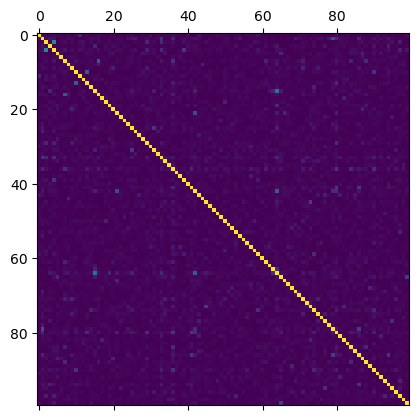

In [70]:
plt.matshow(data_x.iloc[:,:100].corr(method = 'pearson').abs())
plt.show()

1.9 Visualizing data

In [64]:
vis = Visualization()

In [65]:
vis.features_plot(data_x, data_y)

In [44]:
full_data_y = full_data[['smiles', 'target']]
vis.plot(full_data_y)

Encoding molecule 0: Cc1ccc(C2(CN3CCC(NC(=O)c4cc[nH]n4)CC3)CCCCC2)cc1
Encoding molecule 1: Cc1c(C(C)C)c(=O)on1C(=O)N1C(C)CCC1C
Encoding molecule 2: COc1cc(OC)cc(-c2cn(-c3ccc(O)c(C(=O)Nc4cccc(C(=O)O)c4)c3)nn2)c1
Encoding molecule 3: C=C(C)C1C2C(C)CCC2C2(C)CCC12
Encoding molecule 4: C=CC(C)(C=Cc1ccc(Nc2ccccc2)cc1)CCC=C(C)C
Encoding molecule 5: CCc1noc(C(C)N2CCC(NC(=O)c3ccc(C)s3)CC2)n1
Encoding molecule 6: CC(C)=CCCC(C)=CCCC(C)=CCSCC(NC(=O)CCCCCN1CCCC1)C(=O)N1CCCCC1
Encoding molecule 7: COC1(c2ccccn2)CCCN(c2nnc(N3CCC(N4CCCCC4)CC3)s2)C1
Encoding molecule 8: COc1ccc(NC(=O)NNC(=O)CCc2ccccc2OC)cc1
Encoding molecule 9: C#CCn1cnc2c(N)nc(C#CC3(O)CCCCC3)nc21
Encoding molecule 10: COc1cccc2c1CCCC2Nc1cc(-c2ccc3ncsc3c2)nc(C)n1
Encoding molecule 11: CSCC(=O)N1CCOC(c2nc(C(C)(C)C)n[nH]2)C1
Encoding molecule 12: Nc1cc(C(=O)OCC(=O)N2CCCC2=O)ccc1Cl
Encoding molecule 13: CN(C)c1nc2c(N)ncnc2n1C1OC(CO)C(O)C1O
Encoding molecule 14: N#CC1CCN(C(=O)N2CC(NC(=O)C3CCCC3)CC(c3ccc(C(F)(F)F)cc3)C2)CC1
Encoding molecul

c:\Users\brend\OneDrive - IQ-UFRJ\zurich_task\utils\visualization.py:70: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
vis.create_BoxHist(data_y)

1.9 Outlier detection and treatment

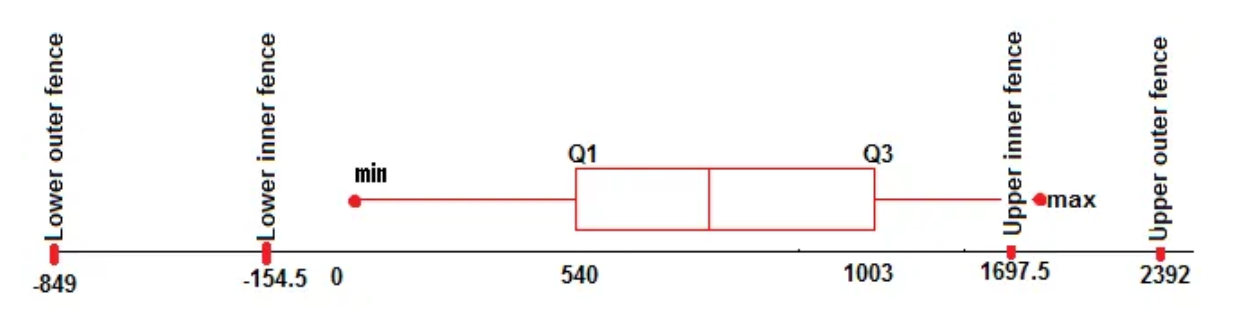

In [11]:
display(Image(filename='img/box_plot_fence.png', width=800))

In [12]:
process = Preprocess(full_data)
data_noOutlier = process.outlier_treatment()
data_x_NoOut = data_noOutlier.iloc[:,3:-1]
data_y_NoOut89 = data_noOutlier.iloc[:,-2]
data_y_NoOut86 = data_noOutlier.iloc[:,-1]

477.1060860488395
-345.0775302423352
86% quantile:    300.43338497130395
89.5% quantile:    448.82901734369085
90% quantile:    479.26420050478976
92.5% quantile:  695.169908221103
95% quantile:    1092.7361019040472
97.5% quantile:  2833.3953294732582
99% quantile:    7671.623095886942
99.9% quantile:  137717.46359598194


In [13]:
vis.create_BoxHist(data_y_NoOut89)

In [14]:
vis.create_BoxHist(data_y_NoOut86)

1.10 Dimensionality reduction

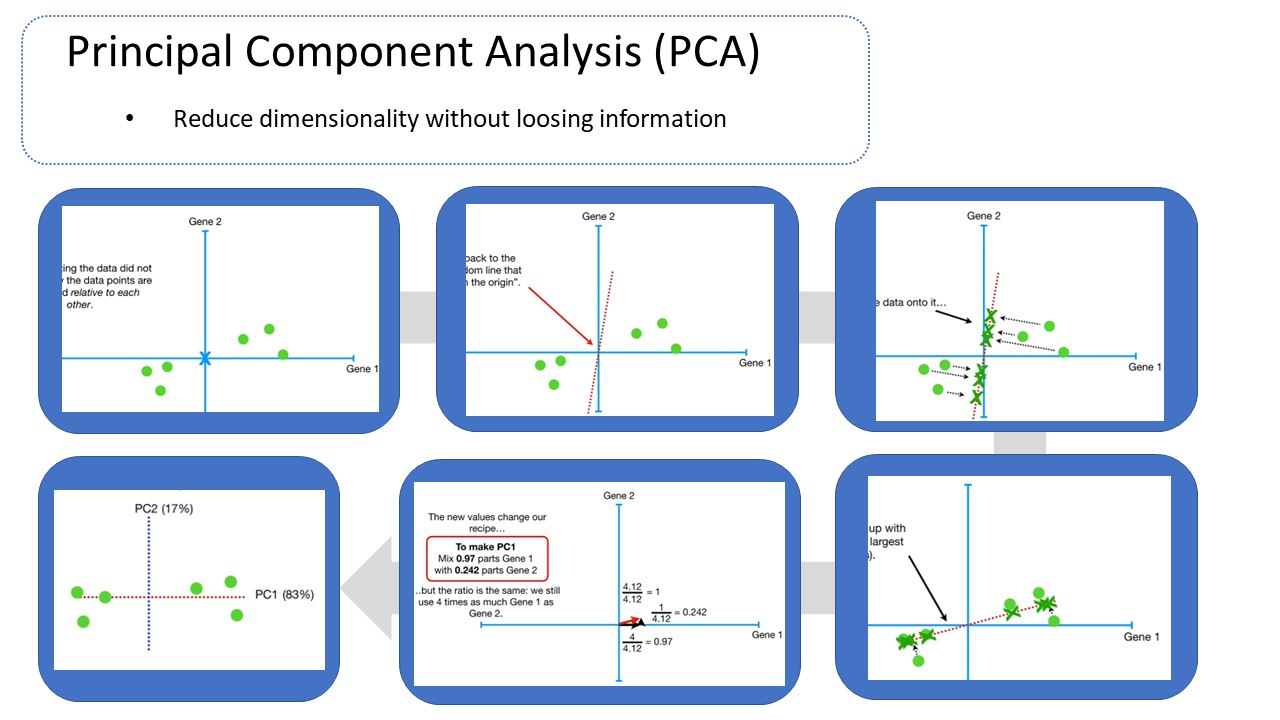

In [15]:
display(Image(filename='img/5.jpg', width=1000))

In [16]:
process = Preprocess(data_x)
data_noOutlier = process.do_DimensionalityReduction(features=500)
data_x_red = data_noOutlier.iloc[:,3:-1]

### 2. Choosing model

In [17]:
print ('The shape of x_train is:', data_x.shape)
print ('The shape of y_train is: ', data_y.shape)
print ('Number of training examples (m):', len(data_x))

The shape of x_train is: (9000, 1024)
The shape of y_train is:  (9000,)
Number of training examples (m): 9000


In [18]:
compare = Compare()

2.1 Linear regression

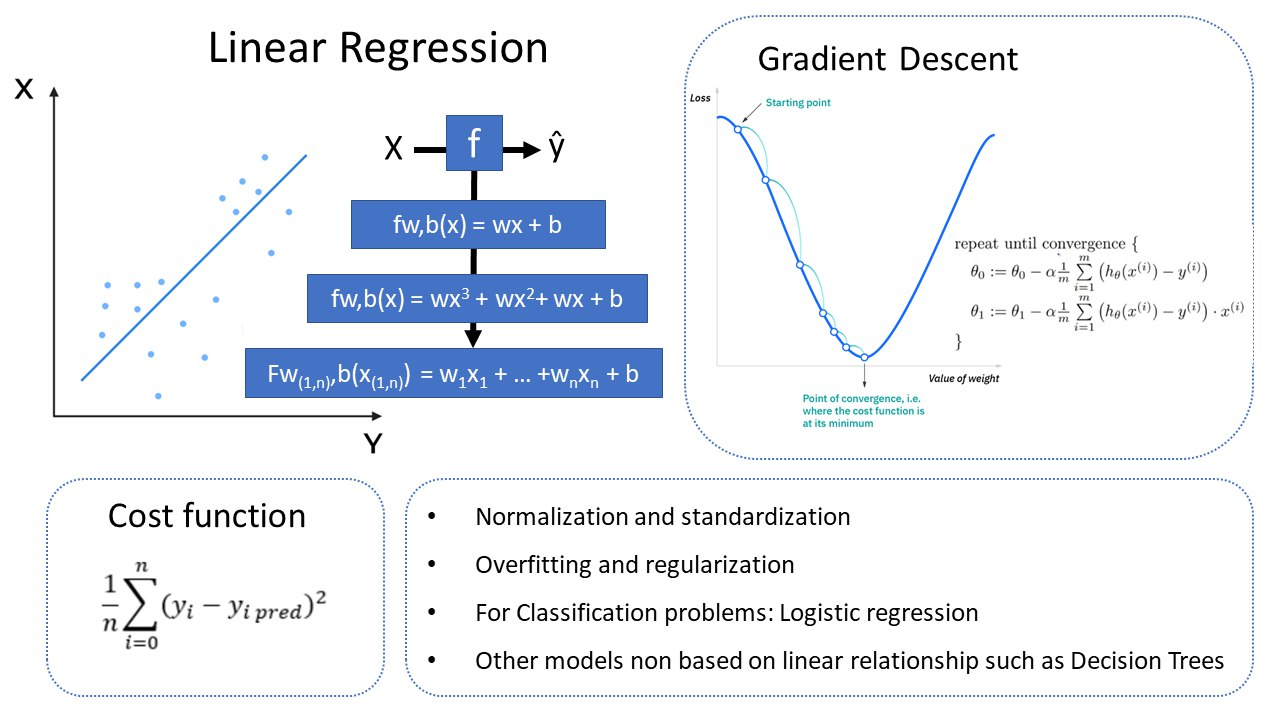

In [19]:
display(Image(filename='img/3.jpg', width=900))

In [66]:
models = [linear_model.LinearRegression(),  linear_model.SGDRegressor(), linear_model.Ridge(), 
          linear_model.Lasso(), linear_model.ElasticNet(), linear_model.BayesianRidge()]
datasets = {'Original':[data_x, data_y], 'Outlier treatment':[data_x, data_y_NoOut86], 
            'Feature reduction':[data_x_red, data_y],
            'Outlier and feature reduction':[data_x_red, data_y_NoOut86],
            'Outlier and log transform':[data_x, np.log(data_y_NoOut86)]}

comparison_results_df = compare.compare_models(models, datasets)

Metrics for Original using LinearRegression() -> Cross Validation score: -7.55 (+/- 24.77),                      Jtrain: 4364903761.49, Jtest: 5468981162.72
Metrics for Original using SGDRegressor() -> Cross Validation score: -6.32 (+/- 20.56),                      Jtrain: 4374936940.72, Jtest: 5356886825.07
Metrics for Original using Ridge() -> Cross Validation score: -7.38 (+/- 24.23),                      Jtrain: 4364977785.14, Jtest: 5455379019.57
Metrics for Original using Lasso() -> Cross Validation score: -7.42 (+/- 24.33),                      Jtrain: 4365002373.09, Jtest: 5457327372.91
Metrics for Original using ElasticNet() -> Cross Validation score: -0.09 (+/- 0.35),                      Jtrain: 4822986351.82, Jtest: 4895594861.77
Metrics for Original using BayesianRidge() -> Cross Validation score: -0.03 (+/- 0.14),                      Jtrain: 4860834349.27, Jtest: 4894634269.11
Metrics for Outlier treatment using LinearRegression() -> Cross Validation score: 0.55 (+/- 0.0

In [67]:
vis = Visualization()

In [68]:
vis.create_ComparePlot(comparison_results_df)

In [69]:
models = [linear_model.LinearRegression(),  linear_model.SGDRegressor(), linear_model.Ridge(), 
          linear_model.Lasso(), linear_model.ElasticNet(), linear_model.BayesianRidge()]
datasets = {'Outlier and log transform':[data_x, np.log(data_y)]}

comparison_results_df_86 = compare.compare_models(models, datasets)

Metrics for Outlier and log transform using LinearRegression() -> Cross Validation score: 0.73 (+/- 0.03),                      Jtrain: 1.08, Jtest: 1.48
Metrics for Outlier and log transform using SGDRegressor() -> Cross Validation score: 0.74 (+/- 0.03),                      Jtrain: 1.10, Jtest: 1.42
Metrics for Outlier and log transform using Ridge() -> Cross Validation score: 0.73 (+/- 0.03),                      Jtrain: 1.08, Jtest: 1.48
Metrics for Outlier and log transform using Lasso() -> Cross Validation score: -0.00 (+/- 0.00),                      Jtrain: 5.43, Jtest: 5.43
Metrics for Outlier and log transform using ElasticNet() -> Cross Validation score: -0.00 (+/- 0.00),                      Jtrain: 5.43, Jtest: 5.43
Metrics for Outlier and log transform using BayesianRidge() -> Cross Validation score: 0.74 (+/- 0.03),                      Jtrain: 1.11, Jtest: 1.41


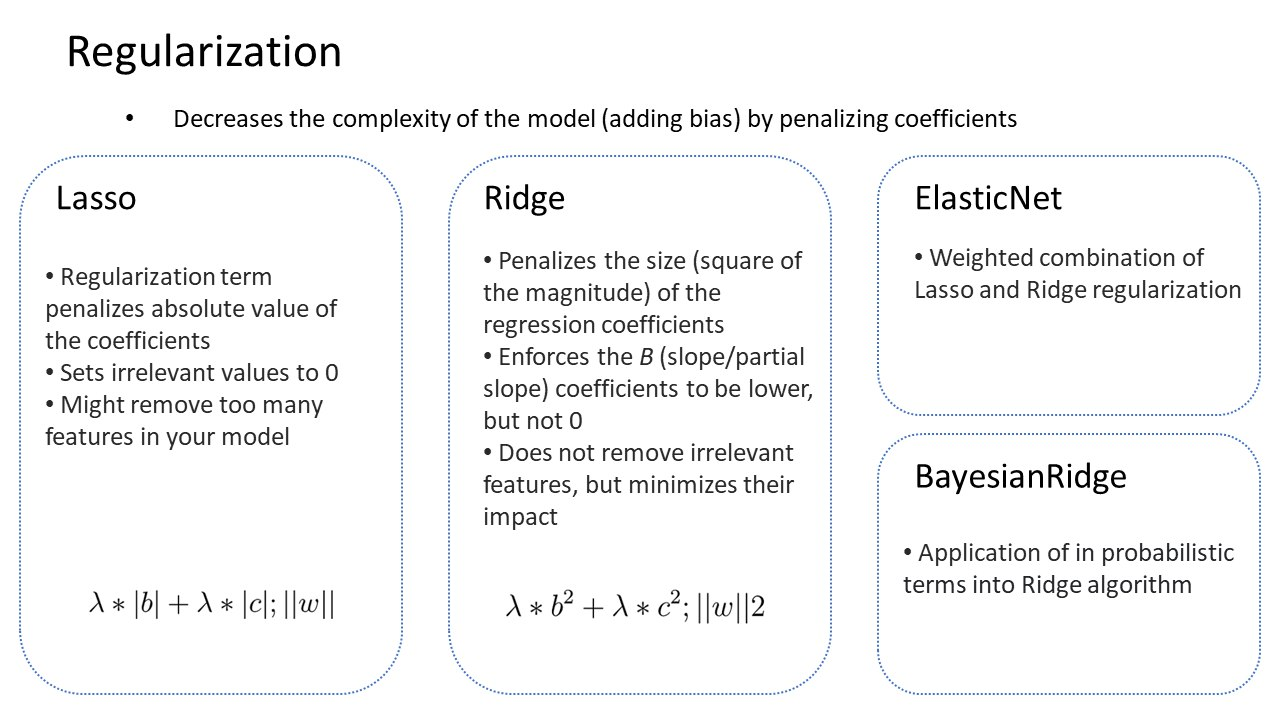

In [53]:
display(Image(filename='img/6.jpg', width=900))

2.1.1 Hyperparameter tunning

In [51]:
models = {"BayesianRidge": linear_model.BayesianRidge()}
param_grid = {"BayesianRidge": {"alpha_1": list(10000.0 ** np.array([-6, -5, -4, -3, -2, -1, 0, 1, 2], dtype=int)),
                    "lambda_1": list(10000.0 ** np.array([-6, -5, -4, -3, -2, -1, 0, 1, 2], dtype=int))}}
best_estimator, best_score = compare.hyperparameter_search(data_x, np.log(data_y), models, param_grid)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3; 1/81] START alpha_1=1e-24, lambda_1=1e-24..............................
[CV 1/3; 1/81] END alpha_1=1e-24, lambda_1=1e-24; neg_mean_squared_error: (train=-1.064, test=-1.469) r2: (train=0.803, test=0.731) total time=   2.1s
[CV 2/3; 1/81] START alpha_1=1e-24, lambda_1=1e-24..............................
[CV 2/3; 1/81] END alpha_1=1e-24, lambda_1=1e-24; neg_mean_squared_error: (train=-1.073, test=-1.452) r2: (train=0.798, test=0.742) total time=   2.1s
[CV 3/3; 1/81] START alpha_1=1e-24, lambda_1=1e-24..............................
[CV 3/3; 1/81] END alpha_1=1e-24, lambda_1=1e-24; neg_mean_squared_error: (train=-1.123, test=-1.341) r2: (train=0.798, test=0.741) total time=   2.1s
[CV 1/3; 2/81] START alpha_1=1e-24, lambda_1=1e-20..............................
[CV 1/3; 2/81] END alpha_1=1e-24, lambda_1=1e-20; neg_mean_squared_error: (train=-1.064, test=-1.469) r2: (train=0.803, test=0.731) total time=   2.2s
[CV 2/3; 2

In [25]:
best_estimator, best_score

([BayesianRidge(alpha_1=1e-24, lambda_1=1.0)], [0.7563857551905874])

In [26]:
models = [linear_model.BayesianRidge(lambda_1=1e-18), linear_model.BayesianRidge(lambda_1=1e-12), 
            linear_model.BayesianRidge(lambda_1=1e-06), linear_model.BayesianRidge(lambda_1=1.0),
            linear_model.BayesianRidge(lambda_1=1000000.0)]
datasets = {'Original':[data_x, data_y], 'Outlier treatment':[data_x, data_y_NoOut86], 
            'Feature reduction':[data_x_red, data_y],
            'Outlier and feature reduction':[data_x_red, data_y_NoOut86],
            'Outlier and log transform':[data_x, np.log(data_y)]}

comparison_results_df_hyp = compare.compare_models(models, datasets)

Metrics for Original using BayesianRidge(lambda_1=1e-18) -> Cross Validation score: -0.03 (+/- 0.14),                      Jtrain: 4860834327.31, Jtest: 4894634267.04
Metrics for Original using BayesianRidge(lambda_1=1e-12) -> Cross Validation score: -0.03 (+/- 0.14),                      Jtrain: 4860834327.31, Jtest: 4894634267.04
Metrics for Original using BayesianRidge() -> Cross Validation score: -0.03 (+/- 0.14),                      Jtrain: 4860834349.27, Jtest: 4894634269.11
Metrics for Original using BayesianRidge(lambda_1=1.0) -> Cross Validation score: -0.03 (+/- 0.09),                      Jtrain: 4900489942.06, Jtest: 4901334512.27
Metrics for Original using BayesianRidge(lambda_1=1000000.0) -> Cross Validation score: -0.03 (+/- 0.09),                      Jtrain: 4900489942.06, Jtest: 4901334512.27
Metrics for Outlier treatment using BayesianRidge(lambda_1=1e-18) -> Cross Validation score: 0.58 (+/- 0.02),                      Jtrain: 3818.93, Jtest: 4717.72
Metrics for Ou

In [27]:
vis.create_ComparePlot(comparison_results_df_hyp)

2.2 Tree architecture

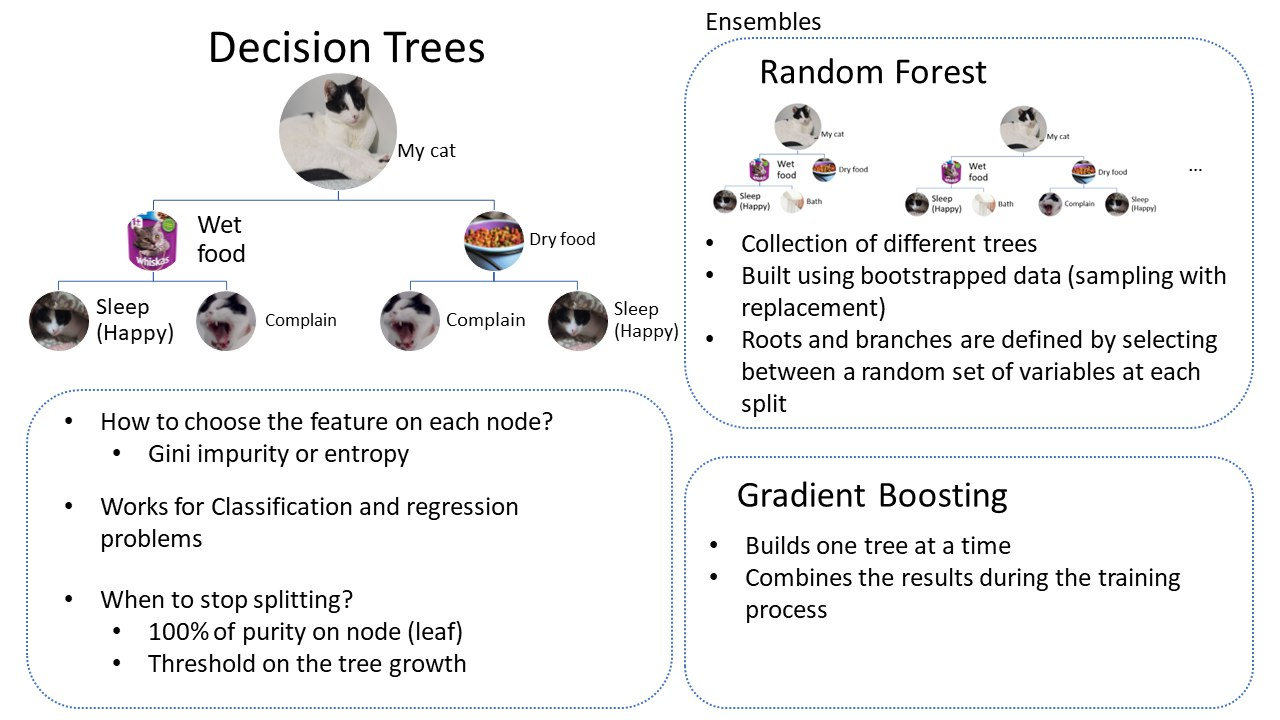

In [54]:
display(Image(filename='img/4.jpg', width=1000))

In [11]:
models = [tree.DecisionTreeRegressor(), ensemble.ExtraTreesRegressor(), ensemble.RandomForestRegressor(),
          ensemble.GradientBoostingRegressor(), ensemble.HistGradientBoostingRegressor()]
datasets = {'Original':[data_x, data_y], 'Outlier treatment':[data_x, data_y_NoOut86], 
            'Feature reduction':[data_x_red, data_y],
            'Outlier and feature reduction':[data_x_red, data_y_NoOut86],
            'Outlier and log transform':[data_x, np.log(data_y_NoOut86)]}

comparison_results_df_tree = compare.compare_models(models, datasets)

Metrics for Original using DecisionTreeRegressor() -> Cross Validation score: -90.78 (+/- 341.84),                      Jtrain: 995050828.88, Jtest: 12258048316.11
Metrics for Original using ExtraTreesRegressor() -> Cross Validation score: -9.50 (+/- 32.57),                      Jtrain: 995050828.88, Jtest: 9261092679.36
Metrics for Original using RandomForestRegressor() -> Cross Validation score: -3.78 (+/- 12.29),                      Jtrain: 1532694915.92, Jtest: 6689405652.78
Metrics for Original using GradientBoostingRegressor() -> Cross Validation score: -11.01 (+/- 42.28),                      Jtrain: 1056057630.35, Jtest: 8363415157.82
Metrics for Original using HistGradientBoostingRegressor() -> Cross Validation score: -1.61 (+/- 5.21),                      Jtrain: 2734749956.88, Jtest: 5285679341.74
Metrics for Outlier treatment using DecisionTreeRegressor() -> Cross Validation score: 0.01 (+/- 0.06),                      Jtrain: 34.02, Jtest: 20668.18
Metrics for Outlier tre

In [14]:
vis.create_ComparePlot(comparison_results_df_tree)

### 3. Training model

In [37]:
from utils.model import Model

model = Model()
kf = KFold(n_splits=5, random_state=42, shuffle=True)
model.build_model(data_x, np.log(data_y), linear_model.BayesianRidge(alpha_1=1e-24, lambda_1=1.0), cross_val=kf)

R2: 0.74 (+/- 0.03)
 MAE: 0.88 
 MSE: 1.41


### 4. Prediction

In [38]:
pred_data = pd.read_csv('task_files/test.csv', sep=',')
split_pred_data = pd.DataFrame([json.loads(f) for f in pred_data["fingerprint"].tolist()]).add_prefix('fingerprint_')

In [39]:
from utils.predict import Predict

predict = Predict()
kf = KFold(n_splits=5, random_state=42, shuffle=True)
pred, test_pred, test_actual = predict.model_prediction(data_x, np.log(data_y), 
                                                        linear_model.BayesianRidge(alpha_1=1e-24, lambda_1=1.0), 
                                                        cross_val=kf, predict_data=split_pred_data)

For this iteration -> Cross Validation score: <function r2_score at 0x000001F57BBE58A0>
For this iteration -> Cross Validation score: <function r2_score at 0x000001F57BBE58A0>
For this iteration -> Cross Validation score: <function r2_score at 0x000001F57BBE58A0>
For this iteration -> Cross Validation score: <function r2_score at 0x000001F57BBE58A0>
For this iteration -> Cross Validation score: <function r2_score at 0x000001F57BBE58A0>


In [40]:
np.exp(pred)

array([3.31199899e+02, 2.34194591e+02, 5.35975012e+00, 9.22713760e-02,
       3.24426654e-01, 4.35809098e+00, 3.64564019e+01, 1.55162272e+02,
       1.44955214e+01, 5.11096869e+00, 6.26707549e+01, 2.44574353e+02,
       2.79364035e+01, 5.32356417e+00, 1.42768248e+02, 1.02121203e+03,
       2.41445033e+00, 2.79213601e+01, 5.67083206e+00, 8.34157287e+02,
       1.95548338e+01, 1.07394915e+00, 1.46626873e+02, 7.86605211e+01,
       6.58590026e+01, 3.46667772e+01, 4.10870783e+01, 2.62548414e+01,
       2.69912009e+01, 4.07514687e+00, 5.24144226e+01, 1.33962249e+02,
       2.42242019e+03, 1.75268744e+01, 4.90875449e+01, 1.61328736e+01,
       1.38423507e+00, 2.39096727e+01, 1.00898532e+02, 5.91261922e+00,
       7.20723800e+00, 7.69275480e+00, 8.38910411e+00, 2.28758298e+01,
       5.18136025e+01, 1.64805958e+01, 7.08162043e+01, 5.39307234e+01,
       3.82289711e+02, 2.63749063e+00, 2.23966737e+00, 7.14860367e+01,
       3.51048945e+01, 6.82324561e+01, 2.46588565e-01, 1.44281476e+01,
      

In [41]:
predict.write_results(np.exp(pred), 'task_files/prediction.csv')

## What would I do from here?

* Perform hyperparameter tunning on Tree architectures
<br/><br/>
* Investigate data treatments to improve the model:
    * Build an elbow plot for the PCA analysis to define the best number of features relating to changes on variance;
    * Get the scree plot on PCA analysis to understand if information is not being lost on the dimensionality reduction;
    * Check how other treatments could improve the model, i.e Low Variance and High Colinearity features removal
<br/><br/>
* Investigate other architectures

----------------

In [ ]:
pred_df = pd.DataFrame([np.exp(test_pred), np.exp(test_actual)])
pred_df.T